## Practice K-NN
    0. Understand this notebook first
    1. Implement the k-NN algorithm for comparison 
    2. Do not use the sk-learn k-NN (you use it for comparison)  
    3. Housing dataset is given separately  
    4. Test your code inside the this notebook (in step 2.1)
    5. Summarize your observations
    
    
    
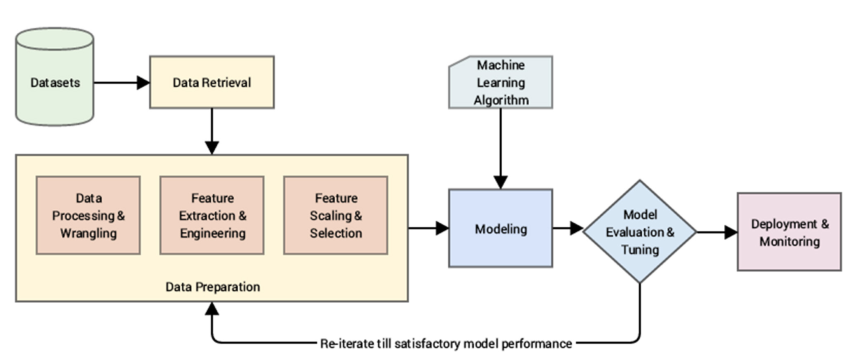

# ML END to END EXAMPLE

**0. Explore Data**  

**1. Prepare the Data for Machine Learning Algorithms**
  - data cleaning, fillin missing values (in this example)
  - categorical -> one-hot
  - feature selection
  - scaling data


**2. Find models for your machine learning**
  - Linear
  - DT
  - Forest
  -------------
  - K-NN, k is a variable of user's choice
  -------------

**3. Analyze the Best Models and Their Errors**
    
    Summarize your observations

    If the model is not good enough, go back step 2 (features, models, parameter tuning, ..)

    Also evaluate the best model of Your System on the Test Set

**4. Launch, Monitor, and Maintain Your System**

-----


In [55]:
## if you have not installed pandas, you need to install pandas

!pip install pandas

# import pandas
import pandas as pd

# STEP 0. Data Exploration

In [56]:
# for simpification, data is saved in local machine
housing = pd.read_csv(r"C:\Users\lukel\OneDrive\Desktop\Machine Learning\housing.csv")

In [57]:
# check the first 5 lines
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [58]:
# check how many rowsxcol
housing.shape

(20640, 10)

In [59]:
# chech data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [60]:
# statistics
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [61]:
# check missing values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [62]:
# check duplicated rows
housing.duplicated().sum()

0

In [64]:
# DONT DO THIS FOR NOW
# This option can be used if you have a lot of data 

#housing.dropna(inplace = True)

# check again
# housing.shape

In [65]:
# check the categorical data
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# (1) ploting

In [66]:
# only for the first time if you did not have it installled
!pip install matplotlib

In [67]:
# rendering to display in Jupyter 
%matplotlib inline 

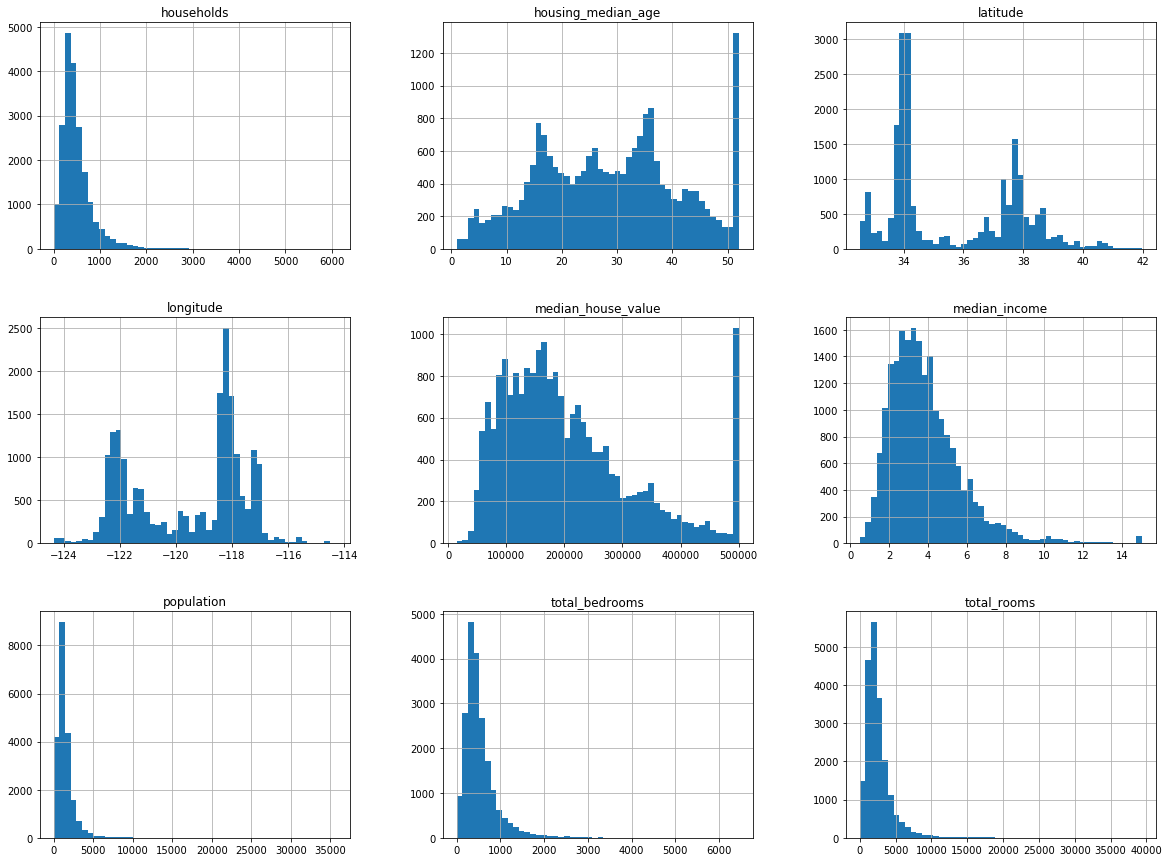

In [68]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

# split data into training vs testing datasets



In [69]:
# two options for spliting
# (1) your own code (2) use sklearn lib.

# This is option (1)
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
# call the function 
train_set, test_set = split_train_test(housing, 0.2)

print(len(train_set))
print(len(test_set))

16512
4128


### option (2) using sklearn tool to split dataset

In [70]:
# install sklearn the first time
!pip install sklearn


In [71]:
# import the function
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [72]:
print(len(train_set))
print(len(test_set))

16512
4128


## stratified sampling (prefer) vs ramdom sampling
 - create new col named as income_cat

In [73]:
# use several bins for income: here bin # = 5
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

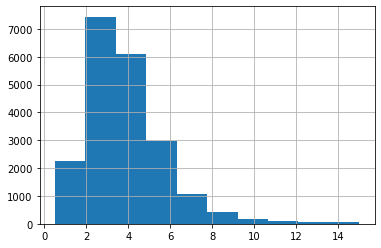

In [82]:
# check distribution
housing["median_income"].hist()

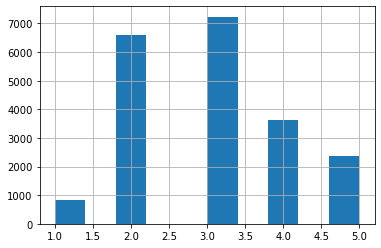

In [83]:
#Check distribution
housing["income_cat"].hist()

In [85]:
# split the data again using stratified sampling in order to keep the data samples proportional

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [86]:
# check the distribution of test data in each bin (group)
strat_test_set["median_income"].value_counts() / len(strat_test_set)

4.1250     0.002907
3.1250     0.002907
15.0001    0.002665
2.1250     0.002422
3.8750     0.002422
             ...   
3.9261     0.000242
2.8510     0.000242
1.2762     0.000242
3.9336     0.000242
2.1382     0.000242
Name: median_income, Length: 3446, dtype: float64

In [87]:
# get rid of the category col for data consistence
for set_ in (strat_train_set, strat_test_set):
    set_.drop("median_income", axis=1, inplace=True)

In [88]:
# take traing set only for ML later
housing = strat_train_set.copy()

# Vizualization 

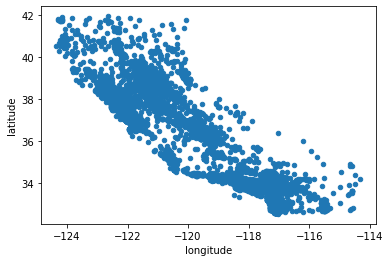

In [89]:
# simple scater
housing.plot(kind="scatter", x="longitude", y="latitude")
# California

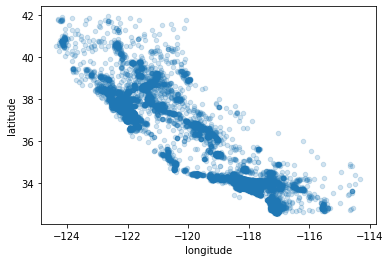

In [90]:
# transparency: alpha in the (0, 1)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2) # transparent: alpha

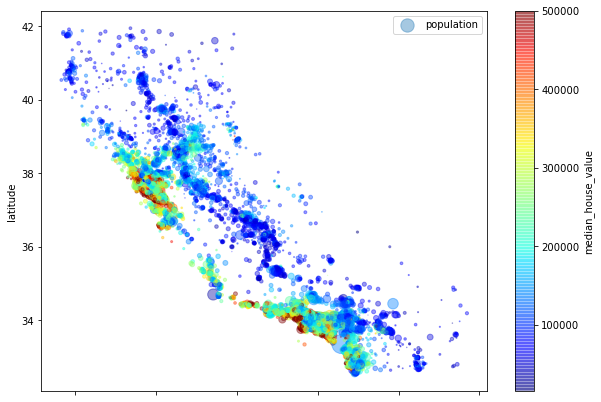

In [91]:
# Next : heatmap-like
# The radius of each circle represents the district’s population (option s), 
# The color represents the price (option c). 
# We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

### Looking for Correlations

In [92]:
#Looking for Correlations:
# for ML, keep only the important features
corr_matrix = housing.corr()

In [93]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014EAB5E5CC8>,
      dtype=object)

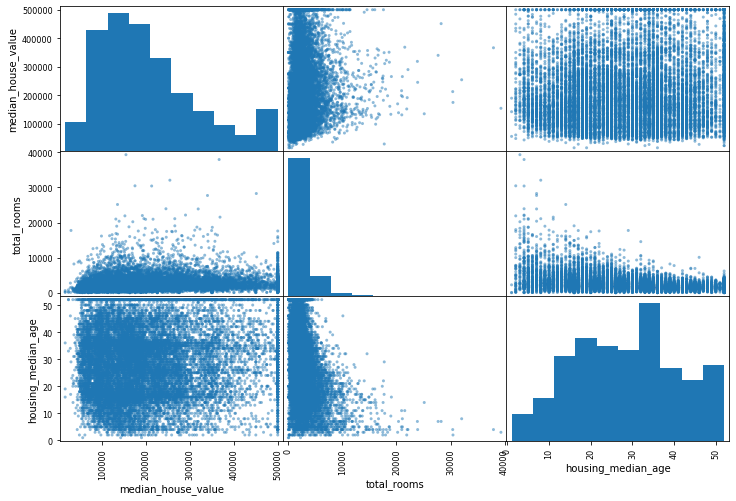

In [95]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "income_cat", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))

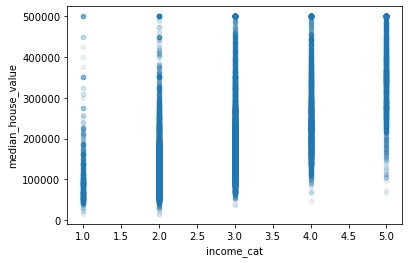

In [97]:
# one-one plot
housing.plot(kind="scatter", x="income_cat", y="median_house_value", alpha=0.1)
 

### Experimenting with Attribute Combinations

In [98]:
# Experimenting with Attribute Combinations
# What you really want is the number of rooms per household

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()

In [99]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### not bad! The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms.

# STEP 1. Prepare the Data for Machine Learning Algorithms

In [100]:
# X for training, drop the dependant variable (y = median_house_value)
housing = strat_train_set.drop("median_house_value", axis=1)

#  the y is considered as label ( y = median_house_value)
housing_labels = strat_train_set["median_house_value"].copy()


### 1.1 Data Cleaning:   missing values
 **fill out by median**

In [101]:
# Three options, inplace = False for test

# option 1: Get rid of the whole attribute.
housing.drop("total_bedrooms", axis=1)

# option 2: Get rid of the corresponding districts with dropna()
housing.dropna(subset=["total_bedrooms"])

# option 3:Set the values to some value (zero, the mean, the median, etc.)
median = housing["total_bedrooms"].median()  
housing["total_bedrooms"].fillna(median, inplace=False)

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
          ...  
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [102]:
# You can use sklearn tool
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [103]:
# Since the median can only be computed on numerical attributes, 
# you need to create acopy of the data without the text attribute ocean_proximity:

# numerical data only
housing_num = housing.drop("ocean_proximity", axis=1)

In [104]:
imputer.fit(housing_num)

# now you will have the median values for all 

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [105]:
# use .statistics_ to check them
imputer.statistics_

array([-118.51,   34.26,   29.  , 2119.5 ,  433.  , 1164.  ,  408.  ,
          3.  ])

In [106]:
# verification use datafram function
housing_num.median()

housing_num.median().values



array([-118.51,   34.26,   29.  , 2119.5 ,  433.  , 1164.  ,  408.  ,
          3.  ])

In [107]:
#  use this “trained” imputer to transform the training set by replacing missing values with the learned medians:
X = imputer.transform(housing_num)

# The result is a plain NumPy array containing the transformed features. 

In [108]:
# Put it back into a pandas DataFrame, it’s simple:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,3.0


### 1.2 Handling Text and Categorical Attributes

In [109]:
housing.shape # THE LABEL IS IN THIS DATA

(16512, 9)

In [110]:
# check the values: first 10
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [111]:
# count all distinct values.
housing_cat.ocean_proximity.value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

### Convert these categories from text to numbers. 
 - use Scikit-Learn’s OrdinalEncoder class
 - bad choice: data is not ordinal, but 


In [112]:
housing_cat.isna().sum()

ocean_proximity    0
dtype: int64

In [113]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:3]  # the first 

array([[0.],
       [0.],
       [4.]])

### Convert to 1-hot variable

there are total 5 categories: 
1-hot example:

1H OCEAN: [1 0 0 0 0]  
NEAR OCEAN[0 0 0 0 1]  
INLAND    [0 1 0 0 0]  

In [114]:
# use one-hot encoder

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
type(housing_cat_1hot)

scipy.sparse.csr.csr_matrix

In [115]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [116]:
# housing one hot is sparse matrix
housing_cat_1hot.shape
type(housing_cat_1hot) # numpy array type

# change to data frame
one_hot =  pd.DataFrame(housing_cat_1hot.toarray())
one_hot.head()

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [117]:
# add column names
one_hot.columns =['<1H OCEAN', 'INLAND', "NEAR OCEAN", "NEAR BAY","ISLAND"] 
one_hot.head()

,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


## 1.3  Feature Selectin:
BASED ON THE CORRELATION AFTER FEATURE COMBINATION OPERATION
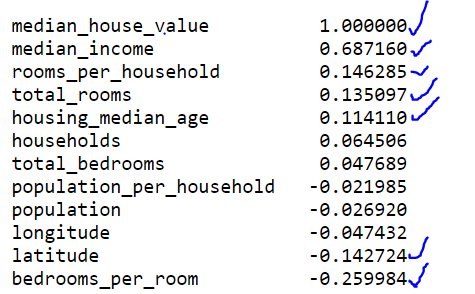

In [118]:
# work on the housing_tr data: MISSING IS FILLED, there are 8 cols

# add  2 cols => +2

housing_tr["rooms_per_household"] = housing_tr["total_rooms"]/housing_tr["households"]
housing_tr["bedrooms_per_room"] = housing_tr["total_bedrooms"]/housing_tr["total_rooms"]
housing_tr.shape

# eliminate: households, total_bedrooms, population, longtitude => -4
housing_tr.drop(["households", "total_bedrooms", "population", "longitude"], axis = 1, inplace = True) 

# 8+2-4 => 6
housing_tr.shape
housing_tr.head()

,latitude,housing_median_age,total_rooms,income_cat,rooms_per_household,bedrooms_per_room
17606,37.29,38.0,1568.0,2.0,4.625369,0.223852
18632,37.05,14.0,679.0,5.0,6.008850,0.159057
14650,32.77,31.0,1952.0,2.0,4.225108,0.241291
3230,36.31,25.0,1847.0,2.0,5.232295,0.200866
3555,34.23,17.0,6592.0,3.0,4.505810,0.231341


## 1.4 Scaling 
 - Normalization: [0, 1]   
 or  
 - Standardization: N(0, 1)

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_tr = scaler.fit_transform(housing_tr)

In [120]:
housing_tr

array([[ 0.77194962,  0.74333089, -0.49323393, -0.95445595, -0.31205452,
         0.15531753],
       [ 0.6596948 , -1.1653172 , -0.90896655,  1.89030518,  0.21768338,
        -0.83628902],
       [-1.34218285,  0.18664186, -0.31365989, -0.95445595, -0.46531516,
         0.4222004 ],
       ...,
       [-0.72478134, -1.56295222,  1.04390119, -0.00620224,  0.3469342 ,
        -0.52177644],
       [-0.85106801,  0.18664186, -0.30991876, -0.00620224,  0.02499488,
        -0.30340741],
       [ 0.99645926,  1.85670895,  0.22085348, -0.00620224, -0.22852947,
         0.10180567]])

In [121]:
# check   
print(housing_tr.shape)
type(housing_tr)

  
housing_tr = pd.DataFrame(housing_tr)
housing_tr.head()

(16512, 6)


,0,1,2,3,4,5
0,0.771950,0.743331,-0.493234,-0.954456,-0.312055,0.155318
1,0.659695,-1.165317,-0.908967,1.890305,0.217683,-0.836289
2,-1.342183,0.186642,-0.313660,-0.954456,-0.465315,0.422200
3,0.313576,-0.290520,-0.362762,-0.954456,-0.079661,-0.196453
4,-0.659299,-0.926736,1.856193,-0.006202,-0.357834,0.269928


In [122]:
# add col names
housing_tr.columns = ["latitude", "housing_median_age", "total_rooms", "median_income", "rooms_per_household", "bedrooms_per_room"]
housing_tr.head()

,latitude,housing_median_age,total_rooms,median_income,rooms_per_household,bedrooms_per_room
0,0.771950,0.743331,-0.493234,-0.954456,-0.312055,0.155318
1,0.659695,-1.165317,-0.908967,1.890305,0.217683,-0.836289
2,-1.342183,0.186642,-0.313660,-0.954456,-0.465315,0.422200
3,0.313576,-0.290520,-0.362762,-0.954456,-0.079661,-0.196453
4,-0.659299,-0.926736,1.856193,-0.006202,-0.357834,0.269928


### merge the two data sets inoto one for ML training

In [123]:
# check 
print(type(one_hot))
print(one_hot.shape)
one_hot.head()

<class 'pandas.core.frame.DataFrame'>
(16512, 5)


,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [124]:
# Merge the numberical + one-hot
X_prepared = housing_tr.join(one_hot)
X_prepared.head()

,latitude,housing_median_age,total_rooms,median_income,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,0.771950,0.743331,-0.493234,-0.954456,-0.312055,0.155318,1.0,0.0,0.0,0.0,0.0
1,0.659695,-1.165317,-0.908967,1.890305,0.217683,-0.836289,1.0,0.0,0.0,0.0,0.0
2,-1.342183,0.186642,-0.313660,-0.954456,-0.465315,0.422200,0.0,0.0,0.0,0.0,1.0
3,0.313576,-0.290520,-0.362762,-0.954456,-0.079661,-0.196453,0.0,1.0,0.0,0.0,0.0
4,-0.659299,-0.926736,1.856193,-0.006202,-0.357834,0.269928,1.0,0.0,0.0,0.0,0.0


# Step 2. Select and Train Model
 - regression: for continuous values
 -


## something is not total consistent with book code:
   -  we should do the split by now
   
   - the reason is that we need to keep the test/train with same scale and features
  
   - otherwise, we should do the same for the testing data (feature selection and scaling )

### for now, forget about the earlier spliting

## 2.0 Spliting data into training and testing (80/20)

In [125]:
# take some data from the scaled data for test now
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prepared, housing_labels, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13209, 11) (3303, 11) (13209,) (3303,)


## 2.1. For different models:  Training and Evaluating on the Training Set 

### (1) First Model: Linear regression

In [126]:
# (a) training model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
# (b) test model
some_data = X_test.iloc[:5]
some_labels = y_test.iloc[:5]


#  compare:
print("Predictions:", lin_reg.predict(some_data))
print("Real Price:", list(some_labels))


Predictions: [221053.61890009 159910.34040921 143610.71787796  75912.08544455
 140717.86191046]
Real Price: [185500.0, 95000.0, 314100.0, 221900.0, 212800.0]


In [128]:
### (c) Evaluation with Mean-squared-error

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(X_test)

lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

print(lin_rmse)



79200.4888041968


### (2) Second model: DT regressor

In [129]:
# Second model: DT regressor

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [130]:
housing_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


90276.14862012397

### (3) Third Model: Random forest


In [131]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [132]:
housing_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

65015.11059918365

# (4) Fourth Model: K-NN

In [205]:
import sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor
k_neighbors_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=23)

In [206]:
#Train the model
k_neighbors_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                    weights='uniform')

In [207]:
# (b) test model
some_data = X_test.iloc[:5]
some_labels = y_test.iloc[:5]


#  compare:
print("Predictions:", k_neighbors_reg.predict(some_data))
print("Real Price:", list(some_labels))

Predictions: [214865.2173913  106956.52173913 138478.26086957 102256.52173913
 130447.82608696]
Real Price: [185500.0, 95000.0, 314100.0, 221900.0, 212800.0]


In [208]:
### (c) Evaluation with Mean-squared-error

from sklearn.metrics import mean_squared_error

housing_predictions = k_neighbors_reg.predict(X_test)

knn_mse = mean_squared_error(y_test, housing_predictions)
knn_rmse = np.sqrt(knn_mse)

print(knn_rmse)

71316.71235078375


### Summary: Forest is better

## 2.2 Cross-Evaluation
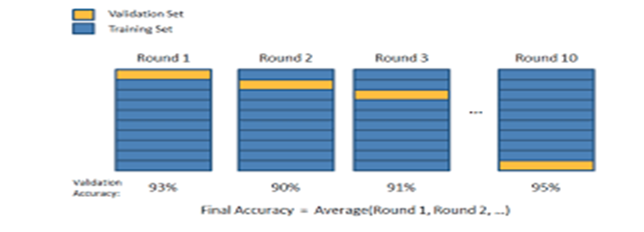

In [147]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [148]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [149]:
display_scores(tree_rmse_scores)

Scores: [86830.05567867 82696.66010384 85231.27892708 85517.0786333
 84631.50647996 83416.01835731 85610.00727807 86377.47398051
 86579.96056408 85793.1612106 ]
Mean: 85268.32012134243
Standard deviation: 1276.5222559459025


Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform
worse than the Linear Regression model!

In [150]:
# try linear model
lin_scores = cross_val_score(lin_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [70800.55853151 71791.09102601 72874.11581446 74716.05202216
 71935.81333676 72417.70082838 73676.16547626 71368.55165733
 69588.99256381 73087.43214319]
Mean: 72225.64733998501
Standard deviation: 1396.297595998403


That’s right: the Decision Tree model is overfitting so badly that it performs worse
than the Linear Regression model.

# 2.3 Fine-Tune Your Model
- (skip for now) Grid Search, but you can try it

In [151]:
from sklearn.model_selection import GridSearchCV
param_grid = [  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
                {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [152]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [153]:
cvres = grid_search.cv_results_

In [154]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

71361.21359744316 {'max_features': 2, 'n_estimators': 3}
64102.68803296384 {'max_features': 2, 'n_estimators': 10}
61396.032688677806 {'max_features': 2, 'n_estimators': 30}
70700.78985843752 {'max_features': 4, 'n_estimators': 3}
63010.174257014776 {'max_features': 4, 'n_estimators': 10}
60946.10292917994 {'max_features': 4, 'n_estimators': 30}
70536.36470850752 {'max_features': 6, 'n_estimators': 3}
63196.667380905295 {'max_features': 6, 'n_estimators': 10}
60998.36568764736 {'max_features': 6, 'n_estimators': 30}
70016.44481611678 {'max_features': 8, 'n_estimators': 3}
63063.7836016171 {'max_features': 8, 'n_estimators': 10}
61033.976665007336 {'max_features': 8, 'n_estimators': 30}
71994.31065541663 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
63730.85400619611 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
70523.38198688334 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
62286.66224316152 {'bootstrap': False, 'max_features': 3, 'n_estimators':

# 3. Analyze the Best Models and Their Errors
 - summarize your observations
 - it is not good enough, go back step 2 (features, models, parameter tuning, ..)
 
 - also evaluate the best model of  Your System on the Test Set

Observations

The random forest algorithm worked the best. It had the lowest mean squared error of about 62305. It worked the best because the underlying function of prediction was not linear. The second best algorithm was the K-NN regression algorithm. It had the second lowest mean squared error of about 71316, when 23 nearest neighbors were used.  The third best was the linear regression algorithm. It had the third lowest mean squared error of about 74528. It worked third best because it used a function that was meant for data that is linearly predictable while this data is not linearly predictable. This data is more complex than a linear correlation between predicting estimates. The fourth best algorithm was the DT Regressor algorithm. It had the highest mean squared error of about 86793. It performed the worst because it overfitted the data more than the K-NN algorithm or the linear regression algorithm.

In [181]:
# reconsider the feature list: 

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.04593907e-01, 7.49587251e-02, 6.57295925e-02, 3.77229052e-01,
       9.54364877e-02, 9.74385279e-02, 2.05060149e-02, 1.36758145e-01,
       6.16690801e-05, 1.42137845e-02, 1.30740934e-02])

<BarContainer object of 11 artists>

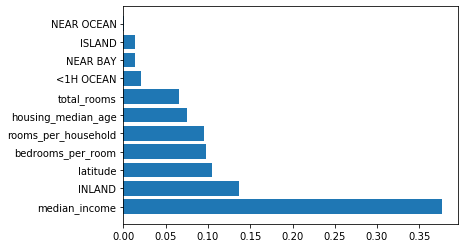

In [183]:
# sort the importance of the features based on the values.
rank_features = sorted(zip(feature_importances, names), reverse=True)
rank, features_names =  zip(*rank_features) # unzip the list

# polt 
plt.barh(features_names, rank)

In [180]:
# this list order is dif. from the book code, because there are feature selection and combined features

# STEP 4. Launch, Monitor, and Maintain Your System
 
 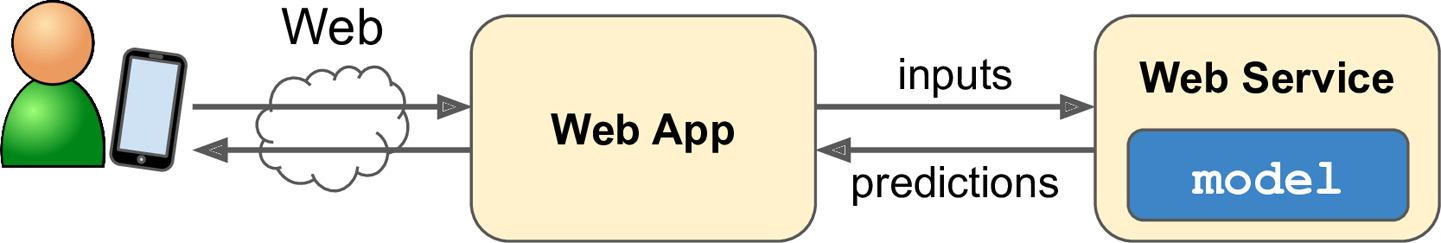

# For educational purposes, the book, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, by Aurelien Geron was used for coding.
-----

# end of the notebook